<h2>图像的基础操作</h2>

<h3>目标</h3>

学会：
<ul>
    <li>获取像素值并修改</li>
    <li>获取图像的属性</li>
    <li>设置图像区域(ROI)</li>
    <li>图像通道的拆分及合并</li>
</ul>

几乎所有的这些操作与 Numpy 的关系都比与 OpenCv 的关系更加紧密，因此熟练使用 Numpy 可以帮助我们写出更好的代码。
（示例将会在Python终端中展示，因为它们大部分只有一行代码。）

<h3>6.1 获取并修改像素值</h3>

首先让我们读入一副图像：

In [2]:
import cv2
import numpy as np

img = cv2.imread('love.jpg')

您可以通过它的行和列坐标获取一个像素值。对于BGR图像，它返回一个蓝色、绿色、红色值的数组。对于灰度图像，只返回相应的强度。

In [3]:
px = img[100,100]
print(px)

#只获取蓝色像素
blue = img[100,100,0]
#只获取红色像素值
#red = img[100,100,1]
print(blue)



[175 186 190]
175


你可以用同样的方法修改像素值。

In [4]:
img[100,100] = [255,255,255]
print(img[100,100])

[255 255 255]


<h4>警告</h4>
Numpy是一个用于快速数组计算的优化库。因此，简单地访问每个像素值并修改它将非常缓慢，如果可以使用Numpy不建议去循环修改。

<h4>注意</h4>上面提到的方法通常用于选择数组的区域，比如前5行和最后3列。对于单个像素访问，Numpy数组方法、array.item()和array.itemset()被认为是更好的。但它总是返回一个标量。因此，如果您想访问所有的B、G、R值，则需要分别调用array.item()。

获取像素值及修改更好的方法：

In [5]:
img.item(10,10,2)
#修改之后
img.itemset((10,10,2),112)
img.item(10,10,2)

112

<h3>6.3 获取图像属性</h3>

图像的属性包括:行，列，通道，图像数据类型，像素数目等<br>
img.shape 可以获取图像的形状。他的返回值是一个包含行数，列数， 通道数的元组。

In [6]:
print (img.shape)

(900, 1440, 3)


 <h4>注意</h4>
 如果图像是灰度图，返回值仅有行数和列数。所以通过检查这个返回值 就可以知道加载的是灰度图还是彩色图。

像素的数目可以通过 img.size 来获取：

In [7]:
print(img.size)

3888000


图像的数据类型可以通过img.dtype来获取：

In [8]:
print(img.dtype)

uint8


<h4>注意</h4>
在调试(debug)时 img.dtype 非常重要。因为在 OpenCV- Python 代码中经常出现数据类型的不一致。


<h3>6.3 图像 ROI</h3>

有时你需要对一幅图像的特定区域进行操作。例如我们要检测一副图像中 眼睛的位置，我们首先应该在图像中找到脸，再在脸的区域中找眼睛，而不是 直接在一幅图像中搜索。这样会提高程序的准确性和性能。<br>
ROI 也是使用 Numpy 索引来获得的。现在我们选择球的部分并把他拷贝到图像的其他区域。

In [ ]:
ball = img[20:310,830:1080] #(纵坐标切片，横坐标切片)
img[60:350,520:770] = ball
cv2.imshow('image',img)
cv2.waitKey(0)           #如果没有这行代码，图像窗口则会无响应
cv2.destroyAllWindows()

<h3>6.4 拆分及合并图像通道</h3>

有时我们需要对 BGR 三个通道分别进行操作。这是你就需要把 BGR 拆 分成单个通道。有时你需要把独立通道的图片合并成一个 BGR 图像。你可以 这样做:


In [ ]:
b,g,r = cv2.split(img)
img = cv2.merge9(b,g,r)

或者：


In [ ]:
b = img[:,:,0]

假如你想使所有像素的红色通道值都为 0，你不必先拆分再赋值。你可以 直接使用 Numpy 索引，这会更快


In [ ]:
img[:,:,2] = 0

<h4> 警告</h4>
cv2.split() 是一个比较耗时的操作。只有真正需要时才用它，能用 Numpy 索引就尽量用。

<h3>6.5 为图像扩充</h3>

如果你想在图像周围创建一个边，就像相框一样，你可以使用 cv2.copyMakeBorder()
函数。这经常在卷积运算或 0 填充时被用到。这个函数包括如下参数:


<ul>
    <li>src 输入图像</li>
    <li>top, bottom, left, right 对应边界的像素数目</li>
    <li>borderType 要添加那种类型的边界，类型如下:
       <ol>
           <li>cv2.BORDER_CONSTANT 添加有颜色的常数值边界，还需要 下一个参数(value)。</li>
           <li>cv2.BORDER_REFLECT 边界元素的镜像。比如: fedcba|abcde- fgh|hgfedcb</li>
           <li>cv2.BORDER_REFLECT_101orcv2.BORDER_DEFAULT 跟上面一样，但稍作改动。例如: gfedcb|abcdefgh|gfedcba</li>
           <li>cv2.BORDER_REPLICATE 重复最后一个元素。例如: aaaaaa| abcdefgh|hhhhhhh</li>
           <li>cv2.BORDER_WRAP 不知道怎么说了, 就像这样: cdefgh| abcdefgh|abcdefg</li>
        </ol>
    </li>
    <li>value 边界颜色，如果边界的类型是 cv2.BORDER_CONSTANT</li>
    </ul>
    为了更好的理解这几种类型请看下面的演示程序。

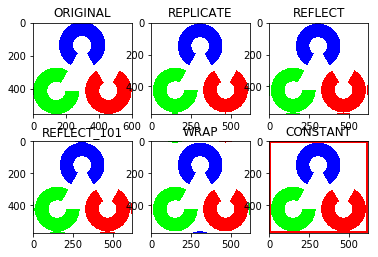

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

BLUE = [255,0,0]

img1 = cv2.imread('opencv-logo.png')

replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()

(由于是使用 matplotlib 绘制，所以交换 R 和 B 的位置， OpenCV 中是按 BGR，matplotlib 中是按 RGB 排列)